### В данной домашней работе Вам предстоит отработать следующие 2 навыка: работа с пропущенными значениями и анализ выбросов.

In [2]:
import numpy as np
import pandas as pd

data = pd.read_csv(r'C:\Users\aefim\github\Start_ML\large\processed_data_with_new_features.csv', index_col='id')

In [3]:
data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,NaN,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,NaN,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Никудышный гном случайно пролил кофе на папку с данными и кодом. К несчастью, из-за этого они с братьями потеряли кучу информации в столбиках **passenger_count** и **distance_km**.

<img src="https://i.imgur.com/YySodUu.png" width="400">

In [4]:
### Выведите количество пропусков в данных колонках
### На всякий случай, проверьте целостность данных в остальных

for col in data.columns:
    print(col, data[col].isnull().sum())

vendor_id 0
passenger_count 145864
store_and_fwd_flag 0
distance_km 145864
log_trip_duration 0
anomaly 0
traffic_jam 0
day_of_week_1 0
day_of_week_2 0
day_of_week_3 0
day_of_week_4 0
day_of_week_5 0
day_of_week_6 0
hour_1 0
hour_2 0
hour_3 0
hour_4 0
hour_5 0
hour_6 0
hour_7 0
hour_8 0
hour_9 0
hour_10 0
hour_11 0
hour_12 0
hour_13 0
hour_14 0
hour_15 0
hour_16 0
hour_17 0
hour_18 0
hour_19 0
hour_20 0
hour_21 0
hour_22 0
hour_23 0
month_2 0
month_3 0
month_4 0
month_5 0
month_6 0


In [5]:
### Сколько потеряем данных, если просто дропнем все строки с NaN?

print(f'Потеряем {data.shape[0] - data.dropna().shape[0]} объектов')

print(f'Это {round(100*(data.shape[0] - data.dropna().shape[0])/data.shape[0], 1)}% выборки')

Потеряем 277253 объектов
Это 19.0% выборки


In [6]:
data.isna().sum()

vendor_id                  0
passenger_count       145864
store_and_fwd_flag         0
distance_km           145864
log_trip_duration          0
anomaly                    0
traffic_jam                0
day_of_week_1              0
day_of_week_2              0
day_of_week_3              0
day_of_week_4              0
day_of_week_5              0
day_of_week_6              0
hour_1                     0
hour_2                     0
hour_3                     0
hour_4                     0
hour_5                     0
hour_6                     0
hour_7                     0
hour_8                     0
hour_9                     0
hour_10                    0
hour_11                    0
hour_12                    0
hour_13                    0
hour_14                    0
hour_15                    0
hour_16                    0
hour_17                    0
hour_18                    0
hour_19                    0
hour_20                    0
hour_21                    0
hour_22       

Начнем с **passenger_count**. Вообще говоря, изначально это была категориальная колонка, к которой мы применили технику OneHotEncoder. Чтобы избавиться от пропусков в данных, конечно, можно просто убрать все объекты, в которых есть пропуски, но тогда мы потеряем ценную информацию. 

Воспользуйтесь относительно простым приемом из лекции: в указанной колонке заполните пропуски самым *популярным* значением среди неотсутствующих.

In [7]:
### Начнем с категориальных  признаков!
### Прием №1: Заполнить пропуски самым популярным значением в колонке passenger_count

data['passenger_count'].value_counts()

930.399753     930354
1005.458335    189262
1070.232174     70348
1028.236276     53751
1061.355223     43460
1053.529749     25543
1718.433333        57
19.666667           3
560.000000          1
104.000000          1
Name: passenger_count, dtype: int64

In [10]:
# Считаем самое популярное значение
popular_value = data['passenger_count'].value_counts().index[0]
print(f'Самое популярное значение: {popular_value}')

# Заполняем пропуски
data['passenger_count'].fillna(popular_value, inplace=True)
data.head()

Самое популярное значение: 930.3997532751514


,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,930.399753,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,930.399753,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [11]:
data['passenger_count'].value_counts()

930.399753     1076218
1005.458335     189262
1070.232174      70348
1028.236276      53751
1061.355223      43460
1053.529749      25543
1718.433333         57
19.666667            3
560.000000           1
104.000000           1
Name: passenger_count, dtype: int64

С колонкой **distance_km** поступим более интересным способом!

Чтобы заполнить пропуск в данной колонке для того или иного объекта, можно находить наиболее похожий на него объект и подглядывать в его значение **distance_km**. Для того, чтобы понять, насколько объекты похожи друг на друга, необходимо использовать Евклидово расстояние между этими самыми объектами в пространстве всех признаков!

<img src="https://wiki.loginom.ru/images/euclid-distance.svg" width="600">

С учетом количества объектов в нашем датасете и признаков, посчитать попарные расстояния будет мега-сложно. Поэтому давайте называть объекты похожими, если они принадлежат одной категории, составленной из следующих колонок:

1. vendor_id
2. store_and_fwd_flag
3. traffic_jam
4. month_2
5. month_3
6. month_4
7. month_5
8. month_6

Внутри каждой группы найдите среднее значение признака **distance_km** и заполните NaN'ы в объектах с пропуском в соответствии с тем, к какой категории относится данный объект. Похожее упражнение мы делали на практике в занятии!

**Hint**: достаточно просто взять group by по указанным выше категориальным колонкам и верно вставить полученный результат в исходную табличку.

P.S. Колонки выбраны случайным образом. Можно было взять и другую комбинацию.

In [12]:
# Группируем данные по столбцам 'vendor_id', 'store_and_fwd_flag', 'traffic_jam', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6'
# и вычисляем среднее значение по столбцу 'distance_km' для каждой группы
grouped_means = data.groupby(['vendor_id', 'store_and_fwd_flag', 'traffic_jam', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6'])['distance_km'].transform('mean')

# Заменяем отсутствующие значения в столбце 'distance_km' на среднее значение для соответствующей группы
data['distance_km'].fillna(grouped_means, inplace=True)

# Проверяем, остались ли пропущенные значения в DataFrame
data.isna().sum()


vendor_id             0
passenger_count       0
store_and_fwd_flag    0
distance_km           0
log_trip_duration     0
anomaly               0
traffic_jam           0
day_of_week_1         0
day_of_week_2         0
day_of_week_3         0
day_of_week_4         0
day_of_week_5         0
day_of_week_6         0
hour_1                0
hour_2                0
hour_3                0
hour_4                0
hour_5                0
hour_6                0
hour_7                0
hour_8                0
hour_9                0
hour_10               0
hour_11               0
hour_12               0
hour_13               0
hour_14               0
hour_15               0
hour_16               0
hour_17               0
hour_18               0
hour_19               0
hour_20               0
hour_21               0
hour_22               0
hour_23               0
month_2               0
month_3               0
month_4               0
month_5               0
month_6               0
dtype: int64

In [14]:
data.head(20).to_csv('step7.csv', sep=';', index=False)

Выполните необходимые вычисления в ноутбуке. Сохраните первые 20 значений полученного датафрейма в файл в формате csv с сепаратором ;.  При сохранении укажите index=False. Отправьте полученный файл в форму ниже.

### Теперь наши данные чисты! Замерьте качество модели на Кросс-Валидации

In [17]:
from sklearn.model_selection import KFold

selector = KFold(n_splits=4, shuffle=True, random_state=33)

from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

model = LinearRegression()

cv_results = cross_validate(model, data.drop('log_trip_duration', axis=1), data['log_trip_duration'], cv=selector, scoring='neg_mean_squared_error')

cross_val_error = np.mean(-cv_results['test_score'])

print(f"MSLE на Кросс-валидации: {round(cross_val_error, 3)}")

MSLE на Кросс-валидации: 0.431


### Проведем анализ выбросов! Нарисуйте ящик с усами и гистограмму для таргетной переменной.

<img src="https://media.discordapp.net/attachments/1004748557477224498/1081185808368816199/MAD_a_pencil_sketch_of_a_wooden_box_with_mustache_7fd79981-6f1c-46c3-9df8-378de1e3b07f.png?width=668&height=668" width="400">

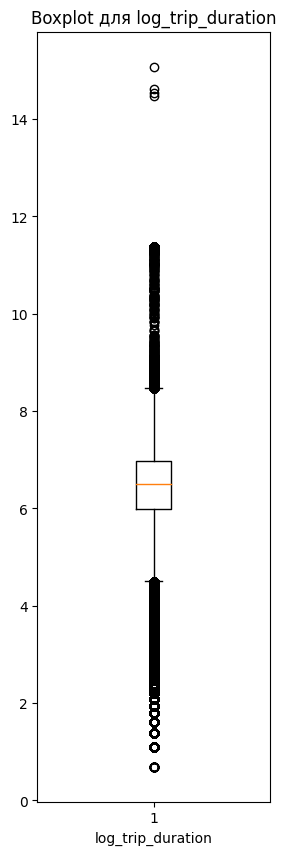

In [20]:
import matplotlib.pyplot as plt

# Создаем объект для рисования графика
fig = plt.figure(figsize=(3, 10))

# Рисуем ящик с усами для столбца 'log_trip_duration'
plt.boxplot(data['log_trip_duration'].values)

# Оформляем график: задаем подписи для осей и заголовок
plt.xlabel('log_trip_duration')
plt.title('Boxplot для log_trip_duration')

# Отображаем график
plt.show()


Есть ли, на ваш взгляд, в данных выбросы?

Кажется, что да!

Давайте почистим их, удалив те объекты, таргеты которых находятся вне промежутка

(топ 99,5% значение;   топ 0,5% значение)

In [22]:
# Вычисляем квантили
q_low = data["log_trip_duration"].quantile(0.005)
q_high = data["log_trip_duration"].quantile(0.995)

# Отфильтровываем выбросы
new_data = data[(data["log_trip_duration"] < q_high) & (data["log_trip_duration"] > q_low)]

Снова замерьте качество на кросс-валидации, используя старый selector

In [23]:
X_1 = new_data.drop('log_trip_duration', axis=1)
Y_1 = new_data[['log_trip_duration']]

cv_result = cross_validate(model, X_1, Y_1,
                           scoring='neg_mean_squared_error',
                           cv=selector)

cross_val_error_1 = np.mean(-cv_result['test_score'])

print(f"MSLE на Кросс-валидации: {round(cross_val_error_1, 3)}")

MSLE на Кросс-валидации: 0.35
